# Tim 3

-Живка Груевска ,Ива Тошевска, Ангел Котевски

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

## Задача 1. 
Еден доктор собирал податоци за ефикасноста на лек за намалување на крвниот 
притисок кај неговите пациенти. За оваа цел докторот по случаен избор одбрал 
пациенти и ја следел состојбата со нивниот крвен притисок. Сите пациенти во 
истражувањето имаат покачен притисок (се разгледува само „горниот“, систолички
притисок), а се претпоставува дека лекот позитивно влијае на намалување на 
притисокот.
Податоците за пациентите се дадени во Prva_zadaca.csv.

Колоната Merenje 1 содржи податоци за измерениот притисок на првиот ден на истражувањето.

Колоната Merenje 2 содржи податоци за измерениот притисок шест месеци после првиот ден.

Колоната Primil lek ili ne содржи податоци за тоа дали пациентот примил лек или не (1 ако примил, 0 ако не примил). Оваа променлива е од категориски тип.

In [2]:
df_z1 = pd.read_csv('Prva_zadaca.csv')
df_z1.head()

,Unnamed: 0,Merenje 1,Merenje 2,Primil lek ili ne
0,0,151.354987,128.022177,1
1,1,140.893229,142.951676,0
2,2,149.398011,123.352114,1
3,3,145.447638,144.392613,0
4,4,146.130695,111.255393,1


а) Изберете соодветен начин за визуелизација на дадените податоци и напишете 
кратки коментари за добиените графици.

In [3]:
df_z1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         100 non-null    int64  
 1   Merenje 1          100 non-null    float64
 2   Merenje 2          100 non-null    float64
 3   Primil lek ili ne  100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


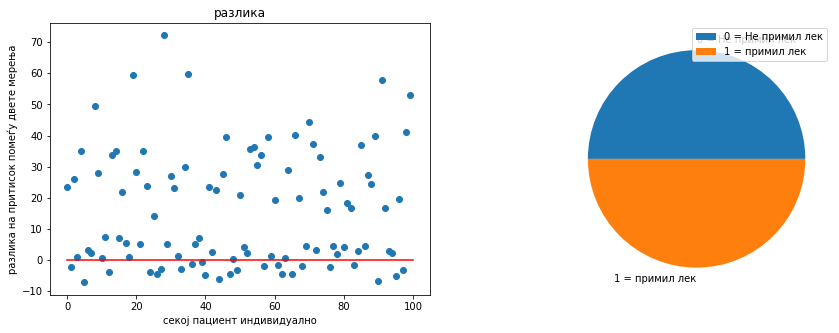

In [10]:
mer_1=[df_z1['Merenje 1'][i] for i in range(len(df_z1))]
mer_2=[df_z1['Merenje 2'][i] for i in range(len(df_z1))]
razlika=[mer_1[i]-mer_2[i] for i in range(0,len(df_z1))]

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter([i for i in range(len(df_z1))],razlika)
plt.plot([100,0],[0,0], c='r')#dali lekot voopsto ima efekt
plt.title('разлика')
plt.xlabel('секој пациент индивидуално')
plt.ylabel('разлика на притисок помеѓу двете мерења')

plt.subplot(1, 2, 2)
sizes = (((df_z1[df_z1['Primil lek ili ne']==0])).count()[0])
labels_p = ['0 = Не примил лек','1 = примил лек']
plt.pie((sizes, len(df_z1)-sizes),labels = labels_p )
plt.legend()
plt.show()

Просечната вредност на првото мерење е 149.38304721420002, додека медијаната е 150.7087284185807
Просечната вредност на второто мерење е 133.53441853698152, додека медијаната е 137.01107452776515


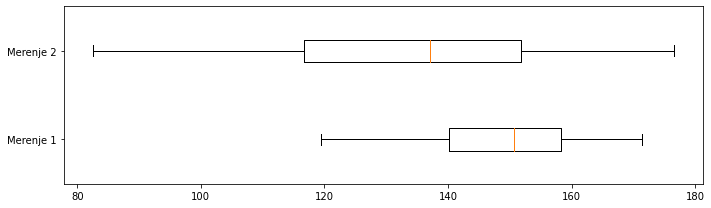

In [11]:
mean_M1 = df_z1['Merenje 1'].mean()
median_M1 = df_z1['Merenje 1'].median()

print(f'Просечната вредност на првото мерење е {mean_M1}, додека медијаната е {median_M1}')

mean_M2 = df_z1['Merenje 2'].mean()
median_M2 = df_z1['Merenje 2'].median()

print(f'Просечната вредност на второто мерење е {mean_M2}, додека медијаната е {median_M2}')

labels_h = ['Merenje 1', 'Merenje 2']

plt.rcParams["figure.figsize"] = [10, 3]
plt.rcParams["figure.autolayout"] = True

data = pd.DataFrame({"Merenje 1": df_z1['Merenje 1'], "Merenje 2":df_z1['Merenje 2']})
ax = plt.boxplot(data, widths=(0.25, 0.25), labels = labels_h, vert = False )

plt.show()

б) Категоризирајте ги податоците и направете основна статистичка анализа за 
добиените променливи (descriptive statistics analysis)

In [7]:
print(df_z1.columns)
print(df_z1['Merenje 1'].describe())
print('-------------------------------------------------------------------------------')
print(df_z1['Merenje 2'].describe())


Index(['Unnamed: 0', 'Merenje 1', 'Merenje 2', 'Primil lek ili ne'], dtype='object')
count    100.000000
mean     149.383047
std       11.442346
min      119.488833
25%      140.149544
50%      150.708728
75%      158.317202
max      171.349918
Name: Merenje 1, dtype: float64
-------------------------------------------------------------------------------
count    100.000000
mean     133.534419
std       22.500510
min       82.505925
25%      116.704885
50%      137.011075
75%      151.804897
max      176.539961
Name: Merenje 2, dtype: float64


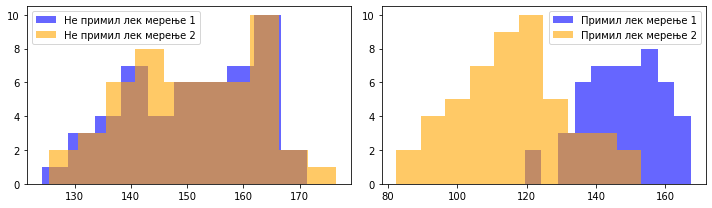

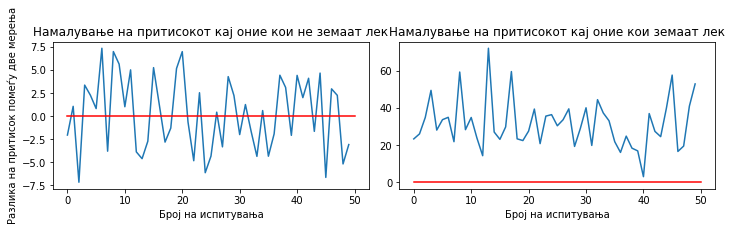

In [12]:
m1_prim=df_z1[df_z1['Primil lek ili ne']==1]['Merenje 1']
m2_prim=df_z1[df_z1['Primil lek ili ne']==1]['Merenje 2']
n_primil=len(m1_prim)
m1_neprim=df_z1[df_z1['Primil lek ili ne']==0]['Merenje 1']
m2_neprim=df_z1[df_z1['Primil lek ili ne']==0]['Merenje 2']
n_neprimile=len(m1_neprim)

plt.subplot(1, 2, 2)
plt.hist(m1_prim, alpha = 0.6, color = 'blue')
plt.hist(m2_prim, alpha = 0.6, color = 'orange')
labels_h1 = ['Примил лек мерење 1', 'Примил лек мерење 2']
plt.legend(labels_h1)

plt.subplot(1, 2, 1)
plt.hist(m1_neprim, alpha = 0.6, color = 'blue')
plt.hist(m2_neprim, alpha = 0.6, color = 'orange')
labels_h2 = ['Не примил лек мерење 1', 'Не примил лек мерење 2']
plt.legend(labels_h2)
plt.show()


razlika0=[df_z1['Merenje 1'][i]-df_z1['Merenje 2'][i] for i in range(len(df_z1)) if df_z1['Primil lek ili ne'][i]==0]
razlika1=[df_z1['Merenje 1'][i]-df_z1['Merenje 2'][i] for i in range(len(df_z1)) if df_z1['Primil lek ili ne'][i]==1]

plt.subplot(1, 2, 1)
plt.plot([i for i in range(len(razlika0))],razlika0)
plt.plot([len(razlika0),0],[0,0], c='r')
plt.title('Намалување на притисокот кај оние кои не земаат лек')
plt.xlabel('Број на испитувања')
plt.ylabel('Разлика на притисок помеѓу две мерења')

plt.subplot(1, 2, 2)
plt.plot([i for i in range(len(razlika1))],razlika1)
plt.plot([len(razlika1),0],[0,0], c='r')
plt.title('Намалување на притисокот кај оние кои земаат лек')
plt.xlabel('Број на испитувања')
plt.show()



 в) Со помош на соодветни статистички тестови, изведете заклучок дали:



    i) постои значајна разлика помеѓу просечните нивоа на крвен притисок на пациентите на крајот на истражувањето споредено со почетокот;
    
    ii) постои значајно намалување на просечното ниво на крвен притисок на крајот на истражувањето споредено со почетокот 
    кај пациентите кои примиле лек;
    
    iii) постои значајно намалување на просечното ниво на крвен притисок на крајот на истражувањето споредено со почетокот 
    кај пациентите кои не примиле лек;
    
    iv) постои значајна разлика во просечното ниво на крвен притисок на крајот на истражувањето помеѓу пациентите кои 
    примиле лек и пациентите кои не примиле лек.


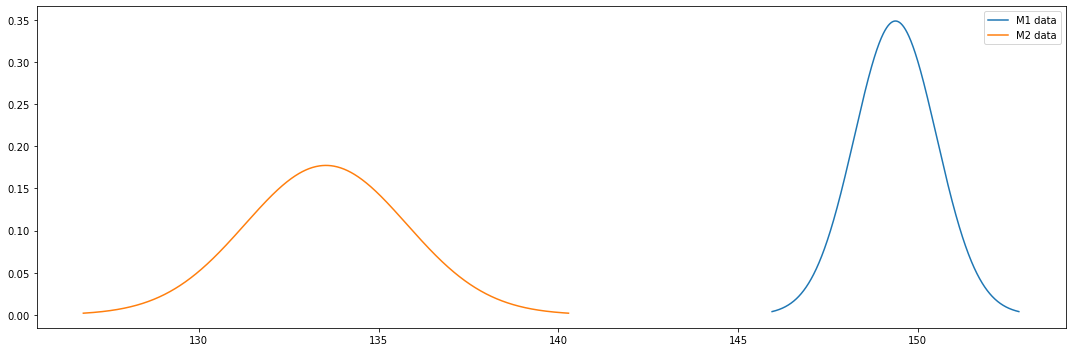

Врз основа на овие податоци, со p-value = 1.3959794628987827e-13, може да кажеме просеците на податоците од првото мерење со просеците на податоците од второт мерење се различни.Со тоа се отфрла нултата хипотеза а се прифаќа алтернативната. 


In [9]:
# I) постои значајна разлика помеѓу просечните нивоа на крвен притисок на пациентите на крајот на истражувањето 
#    споредено со почетокот;

# хипотези
# H0: mu_M1 = mu_M2
# Ha: mu_M1 ≠ mu_M2

M1 = np.array(df_z1['Merenje 1'])
M2 = np.array(df_z1['Merenje 2'])

mean_M1 = np.mean(M1)
stdev_M1 = np.std(M1, ddof=1)
n_M1 = M1.size
se_M1 = stdev_M1/np.sqrt(n_M1)
X_M1 = stats.norm(mean_M1, se_M1)

mean_M2 = np.mean(M2)
stdev_M2 = np.std(M2, ddof=1)
n_M2 = M2.size
se_M2 = stdev_M2/np.sqrt(n_M2)
X_M2 = stats.norm(mean_M2, se_M2)

xs_M1 = np.linspace(mean_M1 - 3*se_M1, mean_M1 + 3*se_M1, 1000)
xs_M2 = np.linspace(mean_M2 - 3*se_M2, mean_M2 + 3*se_M2, 1000)

plt.figure(figsize=(15, 5))
#plt.vlines([mu0, mean], 0, 0.15, color='tab:red', label=f'x-bar = {np.round(mean,2)}')
plt.plot(xs_M1, X_M1.pdf(xs_M1), label='M1 data')
plt.plot(xs_M2, X_M2.pdf(xs_M2), label='M2 data')
plt.legend()
plt.show()


results = stats.ttest_rel(M1, M2,  alternative = 'two-sided')
results.pvalue

print(f'Врз основа на овие податоци, со p-value = {results.pvalue}, може да кажеме просеците на податоците од првото мерење со просеците на податоците од второт мерење се различни.Со тоа се отфрла нултата хипотеза а се прифаќа алтернативната. ')
#3.643033243228077e-09
#0.000000003643

    II) постои значајно намалување на просечното ниво на крвен притисок на крајот на истражувањето споредено со почетокот 
    кај пациентите кои примиле лек;


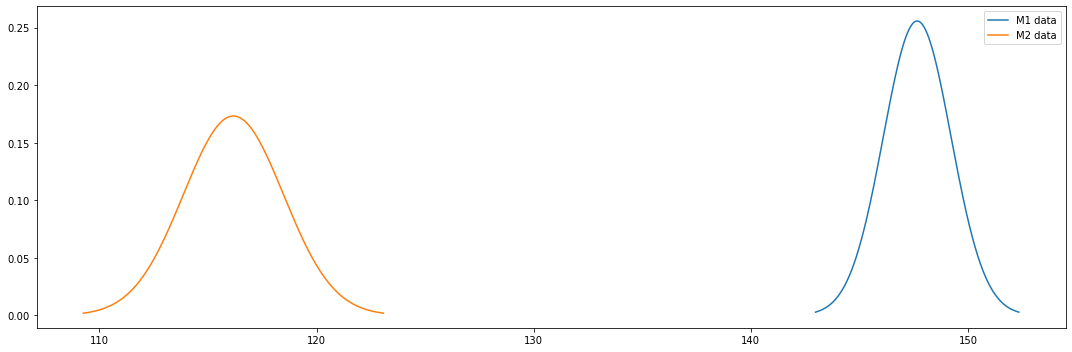

Врз основа на податоците за испитаниците што земале лек, со p-value = [2.87160572e-22], може да кажеме просеците на податоците од првото мерење се поголеми од просеците на податоците од второт мерење се различни. Со тоа се отфрла нултата хипотеза а се прифаќа алтернативната, односно постои значајно намалување на просечното ниво на крвен притисок на крајот на истражувањето споредено со почетокот кај пациентите кои примиле лек 


In [10]:
# II) постои значајно намалување на просечното ниво на крвен притисок на крајот на истражувањето 
#     споредено со почетокот кај пациентите кои примиле лек;

# хипотези
# H0: mean_primil_lek_1 = mean_primil_lek_2   
# Ha: mean_primil_lek_1 > mean_primil_lek_2   

M1 = ['Merenje 1']
M2 = ['Merenje 2']

primil_lek = df_z1[df_z1['Primil lek ili ne'] == 1] 
n_primil_lek = len(primil_lek)

primil_lek_1 = np.array(primil_lek[M1])
primil_lek_2 = np.array(primil_lek[M2])

mean_primil_lek_1 = primil_lek_1.mean()
mean_primil_lek_2 = primil_lek_2.mean()

std_primil_lek_1 = np.std(primil_lek_1, ddof = 1)
std_primil_lek_2 = np.std(primil_lek_2, ddof = 1)

se_primil_lek_1 = std_primil_lek_1 / np.sqrt(n_primil_lek)
se_primil_lek_2 = std_primil_lek_2 / np.sqrt(n_primil_lek)

X_primil_lek_1 = stats.norm(mean_primil_lek_1, se_primil_lek_1)
X_primil_lek_2 = stats.norm(mean_primil_lek_2, se_primil_lek_2)

xs_primil_lek_1 = np.linspace(mean_primil_lek_1 - 3*se_primil_lek_1, mean_primil_lek_1 + 3*se_primil_lek_1, 1000)
xs_primil_lek_2 = np.linspace(mean_primil_lek_2 - 3*se_primil_lek_2, mean_primil_lek_2 + 3*se_primil_lek_2, 1000)

plt.figure(figsize=(15, 5))
plt.plot(xs_primil_lek_1, X_primil_lek_1.pdf(xs_primil_lek_1), label='M1 data')
plt.plot(xs_primil_lek_2, X_primil_lek_2.pdf(xs_primil_lek_2), label='M2 data')
plt.legend()
plt.show()

results_primil_lek = stats.ttest_rel(primil_lek_1, primil_lek_2,  alternative = 'greater')
results_primil_lek.pvalue

print(f'Врз основа на податоците за испитаниците што земале лек, со p-value = {results_primil_lek.pvalue}, може да кажеме просеците на податоците од првото мерење се поголеми од просеците на податоците од второт мерење се различни. Со тоа се отфрла нултата хипотеза а се прифаќа алтернативната, односно постои значајно намалување на просечното ниво на крвен притисок на крајот на истражувањето споредено со почетокот кај пациентите кои примиле лек ')
#5.74321132e-22

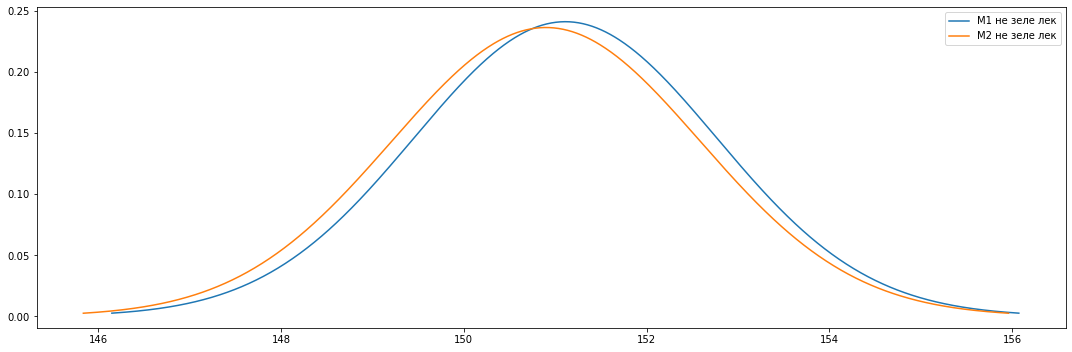

Врз основа на податоците за испитаниците што не зеле лек, со p-value = [0.35338208], може да кажеме просеците на податоците од првото мерење се прилично конзистентни со просеците на податоците од второт мерење. Со тоа се прифаќа нултата хипотеза и се отфрла алтернативната хипотеза, односно не постои значајно намалување на просечното ниво на крвен притисок на крајот на истражувањето споредено со почетокот кај пациентите кои примиле лек 


array([0.35338208])

In [11]:
# III) постои значајно намалување на просечното ниво на крвен притисок на крајот на истражувањето 
#      споредено со почетокот кај пациентите кои не примиле лек

# хипотези
# H0: mean_ne_primil_lek_1 = mean_ne_primil_lek_2   
# Ha: mean_ne_primil_lek_1 > mean_ne_primil_lek_2   

M1 = ['Merenje 1']
M2 = ['Merenje 2']

ne_primil_lek = df_z1[df_z1['Primil lek ili ne'] == 0]
n_ne_primil_lek = len(ne_primil_lek)

ne_primil_lek_1 = np.array(ne_primil_lek[M1])
ne_primil_lek_2 = np.array(ne_primil_lek[M2])

mean_ne_primil_lek_1 = ne_primil_lek_1.mean()
mean_ne_primil_lek_2 = ne_primil_lek_2.mean()

std_ne_primil_lek_1 = np.std(ne_primil_lek_1, ddof = 1)
std_ne_primil_lek_2 = np.std(ne_primil_lek_2, ddof = 1)

se_ne_primil_lek_1 = std_ne_primil_lek_1 / np.sqrt(n_ne_primil_lek)
se_ne_primil_lek_2 = std_ne_primil_lek_2 / np.sqrt(n_ne_primil_lek)

X_ne_primil_lek_1 = stats.norm(mean_ne_primil_lek_1, se_ne_primil_lek_1)
X_ne_primil_lek_2 = stats.norm(mean_ne_primil_lek_2, se_ne_primil_lek_2)

xs_ne_primil_lek_1 = np.linspace(mean_ne_primil_lek_1 - 3*se_ne_primil_lek_1, mean_ne_primil_lek_1 + 3*se_ne_primil_lek_1, 1000)
xs_ne_primil_lek_2 = np.linspace(mean_ne_primil_lek_2 - 3*se_ne_primil_lek_2, mean_ne_primil_lek_2 + 3*se_ne_primil_lek_2, 1000)

plt.figure(figsize=(15, 5))
plt.plot(xs_ne_primil_lek_1, X_ne_primil_lek_1.pdf(xs_ne_primil_lek_1), label='M1 не зеле лек')
plt.plot(xs_ne_primil_lek_2, X_ne_primil_lek_2.pdf(xs_ne_primil_lek_2), label='M2 не зеле лек')
plt.legend()
plt.show()

results_ne_primil_lek = stats.ttest_rel(ne_primil_lek_1, ne_primil_lek_2,  alternative = 'greater')
results_ne_primil_lek.pvalue

print(f'Врз основа на податоците за испитаниците што не зеле лек, со p-value = {results_ne_primil_lek.pvalue}, може да кажеме просеците на податоците од првото мерење се прилично конзистентни со просеците на податоците од второт мерење. Со тоа се прифаќа нултата хипотеза и се отфрла алтернативната хипотеза, односно не постои значајно намалување на просечното ниво на крвен притисок на крајот на истражувањето споредено со почетокот кај пациентите кои примиле лек ')
results_ne_primil_lek.pvalue

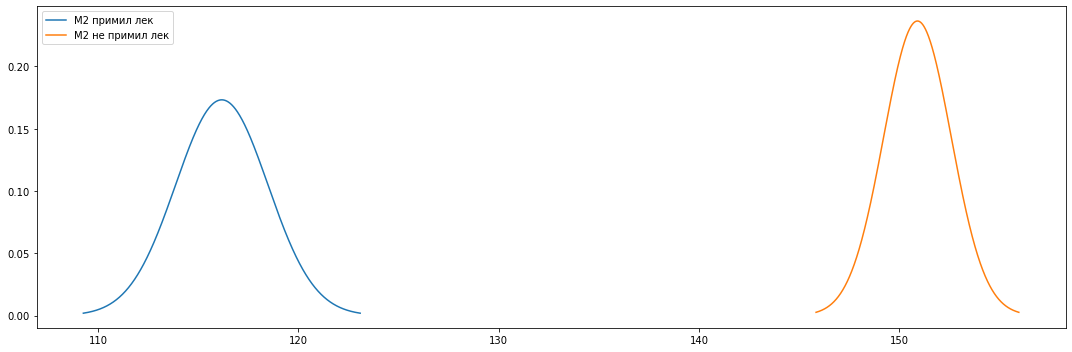

Врз основа на податоците од крајните мерења, со p-value = [1.44081132e-15], може да кажеме дека на крајот од истражувањето, просеците на податоците за крвниот притисок на двете групи пациенти се различни. Со тоа, се отфрла нултата хипотеза, а се прифаќа алтернативната, односно се заклучува дека постои значителна разлика во просечното ниво на крвен притисок на крајот на истражувањето помеѓу пациентите кои примиле лек и пациентите кои не примиле лек.


array([1.44081132e-15])

In [12]:
# IV) постои значајна разлика во просечното ниво на крвен притисок на крајот на истражувањето 
#     помеѓу пациентите кои примиле лек и пациентите кои не примиле лек.

# Хипотези:
# H0: mean_primil_lek_2 = mean_ne_primil_lek_2
# Ha: mean_primil_lek_2 ≠ mean_ne_primil_lek_2

plt.figure(figsize=(15, 5))
plt.plot(xs_primil_lek_2, X_primil_lek_2.pdf(xs_primil_lek_2), label='M2 примил лек')
plt.plot(xs_ne_primil_lek_2, X_ne_primil_lek_2.pdf(xs_ne_primil_lek_2), label='M2 не примил лек')
plt.legend()
plt.show() 

results_krajno = stats.ttest_rel(primil_lek_2,ne_primil_lek_2, alternative = 'two-sided')
results_krajno.pvalue

print(f'Врз основа на податоците од крајните мерења, со p-value = {results_krajno.pvalue}, може да кажеме дека на крајот од истражувањето, просеците на податоците за крвниот притисок на двете групи пациенти се различни. Со тоа, се отфрла нултата хипотеза, а се прифаќа алтернативната, односно се заклучува дека постои значителна разлика во просечното ниво на крвен притисок на крајот на истражувањето помеѓу пациентите кои примиле лек и пациентите кои не примиле лек.')
results_krajno.pvalue

# Задача 2
По завршувањето на првата фаза од истражувањето, докторот добил податоци за нова
група пациенти на кои е направено истото истражување. Но, неговиот несовесен
асистент заборавил да забележи кој пациент примал лек, а кој не и сега таа
информација е загубена. Податоците се дадени во Vtora_zadaca.csv.

а) Со користење на податоците од задача 1 (дадени во Prva_zadaca.csv) конструирајте
(истренирајте) алгоритам за класификација на податоците. Класифицирајте ги
пациентите во две групи: 0 (не примил лек) и 1 (примил лек).

In [13]:
df_z1[0:5]

,Unnamed: 0,Merenje 1,Merenje 2,Primil lek ili ne
0,0,151.354987,128.022177,1
1,1,140.893229,142.951676,0
2,2,149.398011,123.352114,1
3,3,145.447638,144.392613,0
4,4,146.130695,111.255393,1


In [14]:
#=============================================================================================
#==================================PRVO MERENJE ==============================================

[]

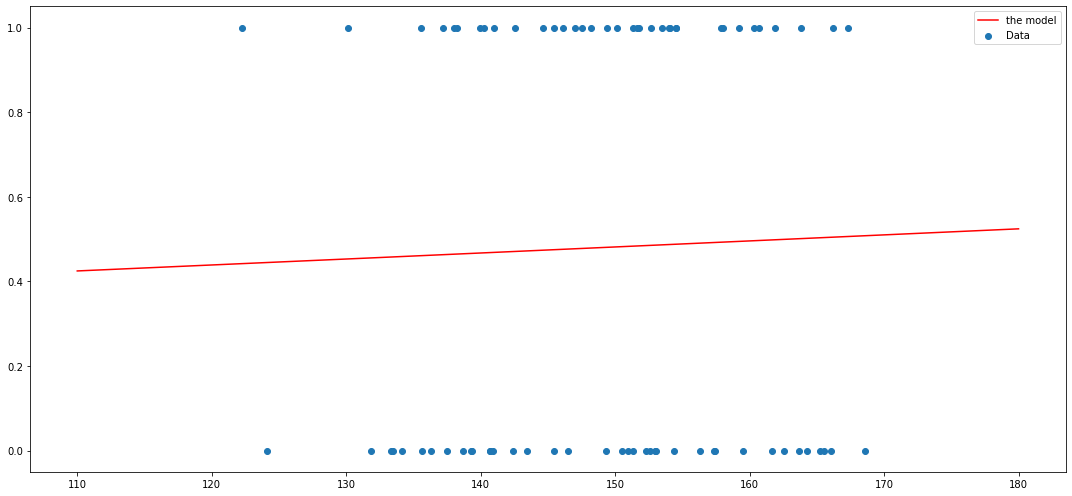

In [15]:
train=df_z1[:75]
test=df_z1[75:]

X_merenje1_train = np.array(train['Merenje 1']).reshape(-1, 1)
y_merenje1_train = np.array(train['Primil lek ili ne'])

X_merenje1_test = np.array(test['Merenje 1']).reshape(-1, 1)
y_merenje1_test = np.array(test['Primil lek ili ne'])

model_merenje1 = LogisticRegression()
model_merenje1.fit(X_merenje1_train,y_merenje1_train)



xs = np.linspace(110, 180, 200).reshape(-1, 1)
ys = model_merenje1.predict_proba(xs)[:, 1]

plt.figure(figsize = (15, 7))
plt.scatter(X_merenje1_train, y_merenje1_train, label='Data')
plt.plot(xs, ys, color='r', label='the model')
plt.legend()
plt.plot()



Evaluating the model on the TRAIN data (no very telling):
Accuracy:  0.48
Evaluating the model on the TEST data (appropriate):
Accuracy:  0.32


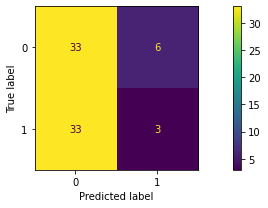

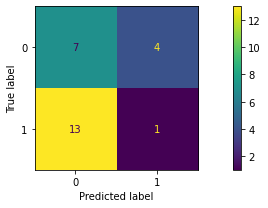

In [16]:
# Making predictions, and evaluate the model
print('Evaluating the model on the TRAIN data (no very telling):')
plot_confusion_matrix(model_merenje1, X_merenje1_train, y_merenje1_train)
print('Accuracy: ', model_merenje1.score(X_merenje1_train, y_merenje1_train))

print('Evaluating the model on the TEST data (appropriate):')
plot_confusion_matrix(model_merenje1, X_merenje1_test, y_merenje1_test)
print('Accuracy: ', model_merenje1.score(X_merenje1_test, y_merenje1_test))

In [17]:
#======================================================================================================
#===================================== vtoro merenje =================================================

[]

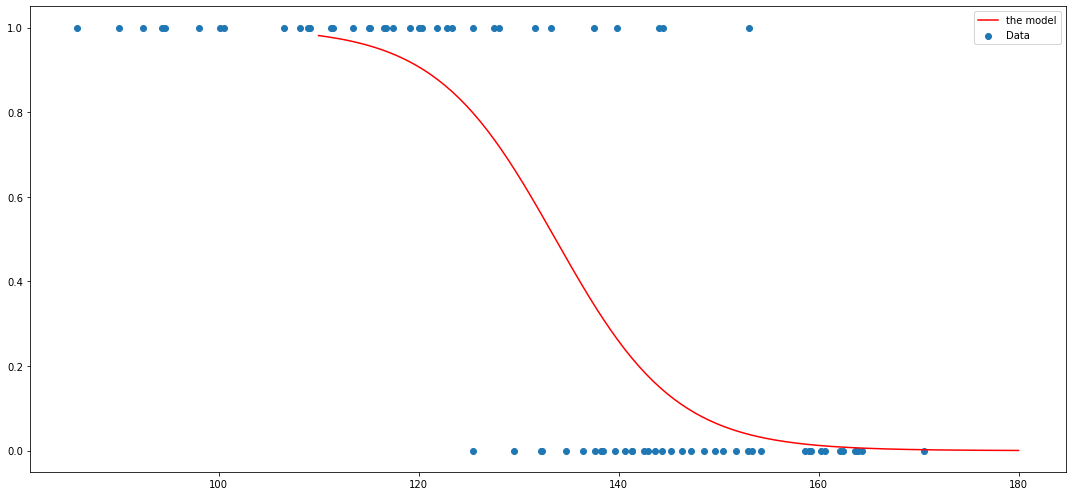

In [18]:
X_merenje2_train = np.array(train['Merenje 2']).reshape(-1, 1)

X_merenje2_test = np.array(test['Merenje 2']).reshape(-1, 1)

model_merenje2 = LogisticRegression()
model_merenje2.fit(X_merenje2_train,y_merenje1_train)



xs = np.linspace(110, 180, 200).reshape(-1, 1)
ys = model_merenje2.predict_proba(xs)[:, 1]

plt.figure(figsize = (15, 7))
plt.scatter(X_merenje2_train, y_merenje1_train, label='Data')
plt.plot(xs, ys, color='r', label='the model')
plt.legend()
plt.plot()


Evaluating the model on the TRAIN data (no very telling):
Accuracy:  0.88
Evaluating the model on the TEST data (appropriate):
Accuracy:  0.92


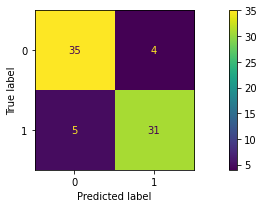

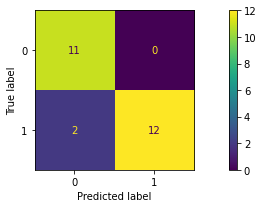

In [19]:
# Making predictions, and evaluate the model
print('Evaluating the model on the TRAIN data (no very telling):')
plot_confusion_matrix(model_merenje2, X_merenje2_train, y_merenje1_train)
print('Accuracy: ', model_merenje2.score(X_merenje2_train, y_merenje1_train))

print('Evaluating the model on the TEST data (appropriate):')
plot_confusion_matrix(model_merenje2, X_merenje2_test, y_merenje1_test)
print('Accuracy: ', model_merenje2.score(X_merenje2_test, y_merenje1_test))

In [20]:
#===============================================================================================
#======================================== dvete ================================================


Evaluating the model on the TRAIN data (no very telling):
Accuracy:  1.0
Evaluating the model on the TEST data (appropriate):
Accuracy:  0.96


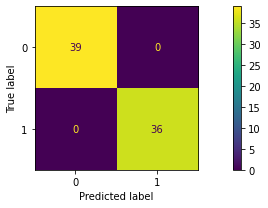

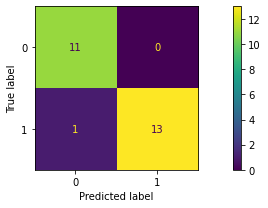

In [21]:
X_m12_train = np.array(train[['Merenje 1', 'Merenje 2']])

X_m12_test = np.array(test[['Merenje 1', 'Merenje 2']])

model_12 = LogisticRegression().fit(X_m12_train, y_merenje1_train)



# Making predictions, and evaluate the model
print('Evaluating the model on the TRAIN data (no very telling):')
print('Accuracy: ', model_12.score(X_m12_train, y_merenje1_train))

print('Evaluating the model on the TEST data (appropriate):')
print('Accuracy: ', model_12.score(X_m12_test, y_merenje1_test))
      
      
plot_confusion_matrix(model_12, X_m12_train, y_merenje1_train)
plot_confusion_matrix(model_12, X_m12_test, y_merenje1_test)



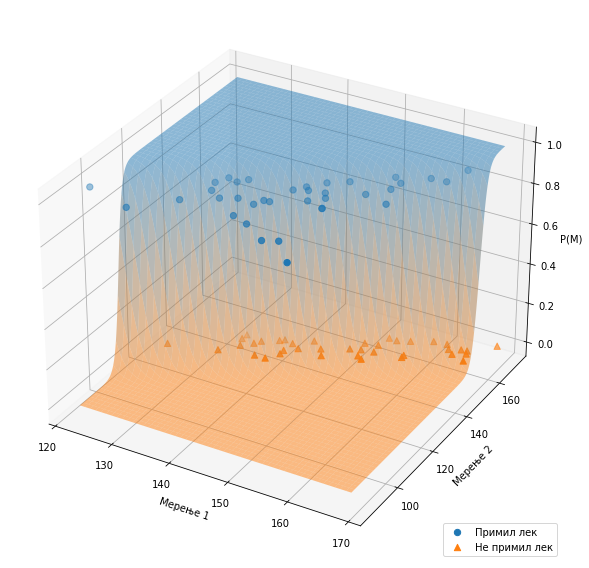

In [22]:
x1 = train.loc[train['Primil lek ili ne'] == 1]['Merenje 1']
y1 = train.loc[train['Primil lek ili ne'] == 1]['Merenje 2']
z1 = train.loc[train['Primil lek ili ne'] == 1]['Primil lek ili ne']

x0 = train.loc[train['Primil lek ili ne'] == 0]['Merenje 1']
y0 = train.loc[train['Primil lek ili ne'] == 0]['Merenje 2']
z0 = train.loc[train['Primil lek ili ne'] == 0]['Primil lek ili ne']

# Creating the surface for the model
xs = np.linspace(X_m12_train[:,0].min(), X_m12_train[:,0].max(), 1000)
ys = np.linspace(X_m12_train[:,1].min(), X_m12_train[:,1].max(), 1000)
xs, ys = np.meshgrid(xs, ys)

b_0 = model_12.intercept_[0]
b_1 = model_12.coef_[0][0]
b_2 = model_12.coef_[0][1]
zs = 1/(1 + np.exp(b_0 + b_1*xs + b_2*ys))

from matplotlib.colors import LinearSegmentedColormap
my_cmap = LinearSegmentedColormap.from_list('mycmap', ['tab:orange', 'tab:blue'])

fig = plt.figure(figsize=(8,8))
ax2 = fig.add_subplot(111, projection='3d')
ax2.plot_surface(xs, ys, zs, cmap=my_cmap, alpha=0.5)
ax2.scatter(x1, y1, z1, marker='o', s=40, label = 'Примил лек')
ax2.scatter(x0, y0, z0, marker='^', s=40, label = 'Не примил лек')
ax2.set_xlabel('Мерење 1')
ax2.set_ylabel('Мерење 2')
ax2.set_zlabel('P(M)')
ax2.legend(loc='lower right')
plt.show()

б) Откако ќе го конструирате алгоритмот во делот а), класифицирајте ги новите
пациенти (чии податоци се дадени во Vtora_zadaca.csv) во според:
    
    i) првото извршено мерење;
    
    ii) второто извршено мерење;
    
    iii) двете извршени мерења.



In [23]:
df2=pd.read_csv('Vtora_zadaca.csv')
df2.head()

,Unnamed: 0,Merenje 1,Merenje 2
0,0,163.419762,156.977602
1,1,154.133336,127.545654
2,2,144.966965,144.371136
3,3,150.545838,150.807626
4,4,153.743813,148.645986


In [24]:
# spored prvo izvrseno merenje
X1 = np.array(df2['Merenje 1']).reshape(-1, 1)
y_mod1 = model_merenje1.predict(X1).reshape(-1,1)

#spored vtoro izvrseno merenje
X2 = np.array(df2['Merenje 2']).reshape(-1, 1)
y_mod2= model_merenje2.predict(X2).reshape(-1,1)

#spored dvete
X3=np.array(df2[['Merenje 1', 'Merenje 2']])
y_mod12 = model_12.predict(X3).reshape(-1,1)


 в) За класификациите што ги направивте во делот б), пресметајте ја прецизноста
(accuracy), направете соодветни визуелизации и направете кратка споредба на основа
на овие параметри.

Evaluating the model on the TEST data (appropriate):
Accuracy:  0.56


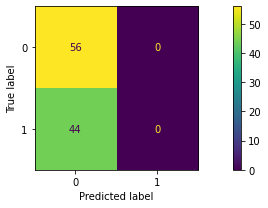

In [25]:
# bidekji 3tiot model ima najgolema tocnost negovide rezultati(predikcii) ke gi zemime kako resenie na 
# merenje 1 i merenje 2 od vtoriot set vsusnost sporeduvame model so model odnosno modelot koj e 
# istreniran na 2te merenja posebno so modelite so poedinecno merenje

#plot_confusion_matrix(model_merenje1,X1,y_mod12)  
plot_confusion_matrix(model_merenje1,y_mod1,y_mod12)  
print('Evaluating the model on the TEST data (appropriate):')
print('Accuracy: ', model_merenje1.score(y_mod1, y_mod12))

Evaluating the model on the TEST data (appropriate):
Accuracy:  0.44


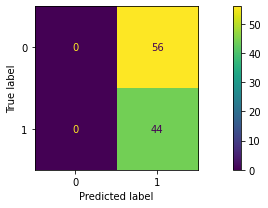

In [26]:
plot_confusion_matrix(model_merenje2,y_mod2,y_mod12)
print('Evaluating the model on the TEST data (appropriate):')
print('Accuracy: ', model_merenje2.score(y_mod2, y_mod12))